In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys, os
import numpy as np
import cv2
sys.path.append('../external/cocoapi/PythonAPI/')
from pycocotools.coco import COCO

In [2]:
sys.path.append('../src/')
from image_helpers import iou, get_largest_annotation
from grabcut_model import GrabCutModel

In [3]:
np.random.seed(0)

In [4]:
# Image dirs
dataDir = '../../data/input/coco'
print(os.listdir(dataDir))
dataType = 'val2017'
annDir = '{}/annotations'.format(dataDir)
annZipFile = '{}/annotations_train{}.zip'.format(dataDir, dataType)
annFile = '{}/instances_{}.json'.format(annDir, dataType)
imgDir = '{}/images/{}'.format(dataDir, dataType)
print (annDir)
print (annFile)
print (annZipFile)
print (imgDir)

['images', 'annotations']
../../data/input/coco/annotations
../../data/input/coco/annotations/instances_val2017.json
../../data/input/coco/annotations_trainval2017.zip
../../data/input/coco/images/val2017


In [5]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!


In [6]:
# get all images containing given categories, select one at random
imgIds = coco.getImgIds();
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# img = coco.loadImgs(347544)[0]
# id = 347544

In [7]:
def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

In [8]:
largest_annotation = get_largest_annotation(coco, img['id'])
largest_mask = coco.annToMask(largest_annotation)

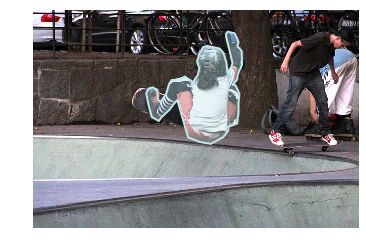

In [9]:
I = cv2.imread(os.path.join(imgDir, img['file_name']))
imshow(I)
coco.showAnns([largest_annotation])

In [10]:
grabcut = GrabCutModel(I)
rect = tuple([int(x) for x in largest_annotation['bbox']])
image_array, iou_array, mask_array, user_input_array = grabcut.multiple_iterations(largest_mask, rect, 20)

(427, 640)


0.4604036520903412
0.5046017443261215
0.5651440686132794
0.5501252562058756
0.6190346332151623
0.7015264118196787
0.7394005688033253
0.7715524718126626
0.8098701298701299
0.8677369673776076
0.8678032420346562
0.884093654185636
0.9000046444661186
0.8543320676561961
0.8969188944268237
0.9058370044052864
0.927357547484172
0.9284456081885265
0.9363017934446506
0.946537290715373


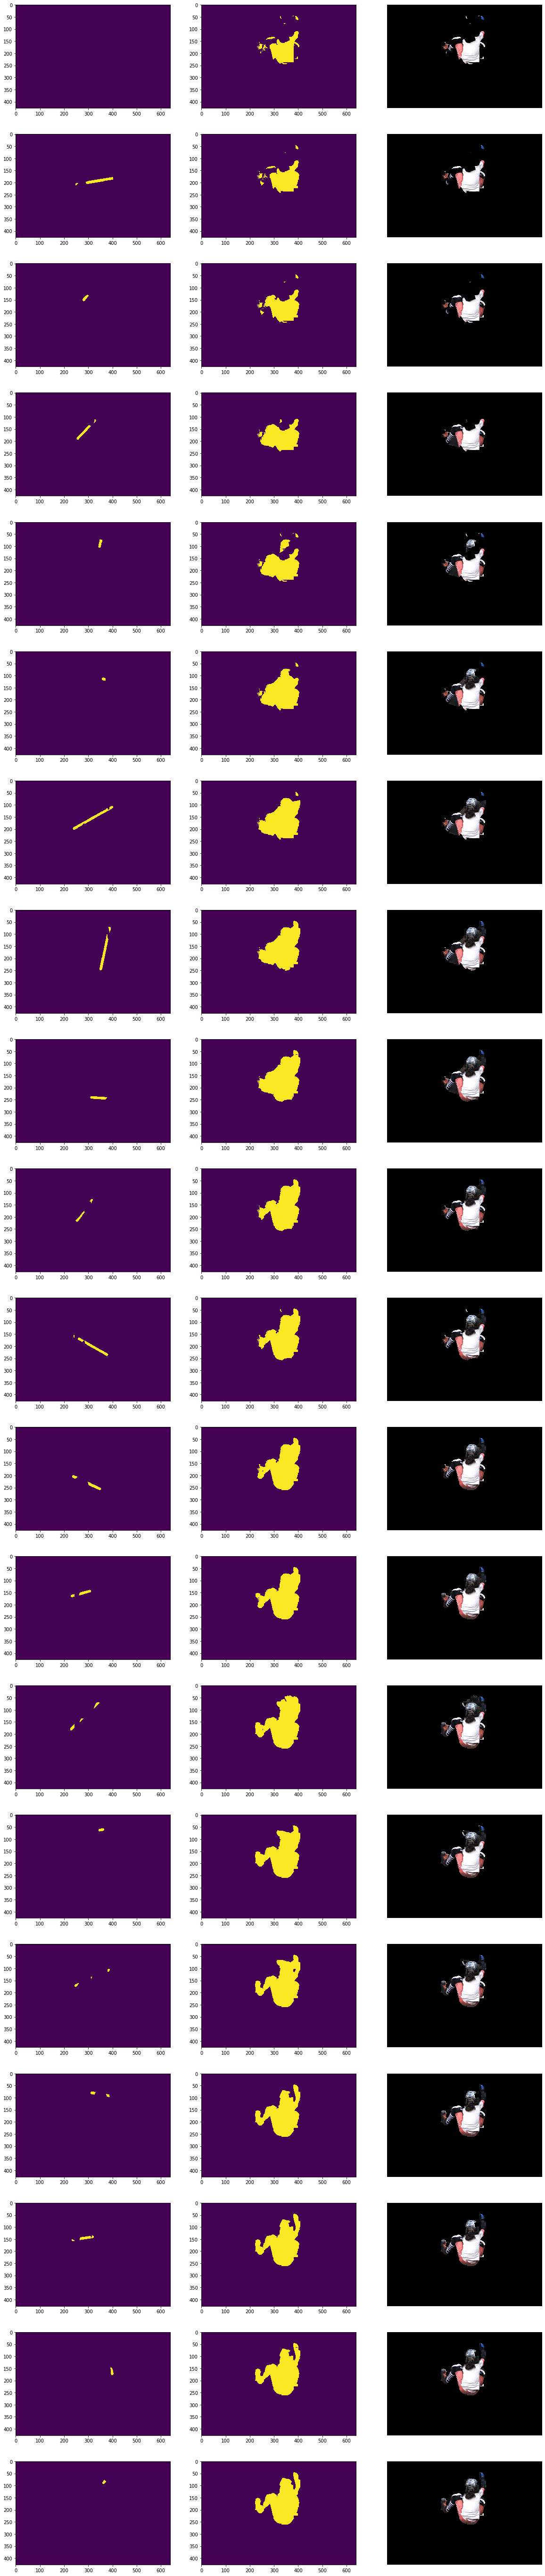

In [13]:
fig = plt.figure(figsize=(20, 100))
N = 20
for i in range(N):
    print(iou(mask_array[i], largest_mask))
    fig.add_subplot(N, 3, 3*i + 1)
    plt.imshow(user_input_array[i])
    fig.add_subplot(N, 3, 3*i + 2)
    plt.imshow(mask_array[i])
    fig.add_subplot(N, 3, 3*i + 3)
    imshow(image_array[i])

In [13]:
output_folder = "/home/richarddu1226/research/data/working/04-08-2019"
def write_helper(img, image_array, iou_array, mask_array, user_input_array):
    fp = os.path.join(output_folder, "{0:012d}_image_array.npy".format(img['id']))
    np.save(fp, np.array(image_array))
    print(fp)
    fp = os.path.join(output_folder, "{0:012d}_iou_array.npy".format(img['id']))
    np.save(fp, np.array(iou_array))
    print(fp)
    fp = os.path.join(output_folder, "{0:012d}_mask_array.npy".format(img['id']))
    np.save(fp, np.array(mask_array))
    print(fp)
    fp = os.path.join(output_folder, "{0:012d}_user_input_array.npy".format(img['id']))
    np.save(fp, np.array(user_input_array))
    print(fp)

In [14]:
write_helper(img, image_array, iou_array, mask_array, user_input_array)

/home/richarddu1226/research/data/working/04-08-2019/000000065350_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000065350_iou_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000065350_mask_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000065350_user_input_array.npy


In [41]:
# imgs = coco.loadImgs(imgIds)
# for img in imgs[:]:
#     print(os.path.join(output_folder, "{0:012d}_image_array.npy".format(img['id'])))

/home/richarddu1226/research/data/working/04-08-2019/000000397133_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000037777_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000252219_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000087038_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000174482_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000403385_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000006818_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000480985_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000458054_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000331352_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000296649_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000386912_image_array.npy
/home/richarddu1

/home/richarddu1226/research/data/working/04-08-2019/000000376206_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000515350_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000050943_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000460333_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000312552_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000436315_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000024144_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000509699_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000489764_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000308587_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000208423_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000553669_image_array.npy
/home/richarddu1

/home/richarddu1226/research/data/working/04-08-2019/000000139260_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000312406_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000356428_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000110999_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000562818_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000529122_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000349594_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000066926_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000521601_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000355677_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000255824_image_array.npy
/home/richarddu1226/research/data/working/04-08-2019/000000447917_image_array.npy
/home/richarddu1